**Основные цели этого задания:**
*   Научиться работать с новыми моделями: случайный лес, градиентный бустинг.
*   Научиться распознавать факты переобучения и недообучения модели.
*   Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров.

**Задача: Построить модель машинного обучения, предсказывающую, является ли вино красным по одиннадцати его характеристикам.**

*1. Загрузите данные, объедините источники в один датафрейм. Составьте целевую переменную на основе файла, из которого вы получили часть данных, изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.*

In [107]:
import pandas as pd
import numpy as np

from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

from imblearn.metrics import sensitivity_score, specificity_score

Сначала посмотрим оба файла по отдельности:

In [39]:
df_white = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.3winequality-white.csv', delimiter=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
df_red = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.3winequality-red.csv', delimiter=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [42]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Пропусков нет, колонки имеют одинаковое название. Но нам не хватает столбца, где будет записано является вино красным или белым. Создадим такой столбец и объединим.

In [43]:
df_red['wine_red'] = 1
df_white['wine_red'] = 0

Если вино красное то значение будет 1, если нет 0

In [44]:
frames = [df_red, df_white]
df_merged = pd.concat(frames)

In [45]:
df_merged.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_red              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [47]:
print(f'Проверяем количество строк: {4898 + 1599} = 6497')

Проверяем количество строк: 6497 = 6497


Строки не "потерялись", можем продолжать

In [48]:
df_merged['wine_red'].value_counts()

wine_red
0    4898
1    1599
Name: count, dtype: int64

Как и предполагалось, в выборке количество строк с красным вином больше практически в 3 раза, чем белого

In [49]:
X = df_merged.drop(['wine_red'], axis=1)
y = df_merged['wine_red']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

Разделили выборку на обучающую и тестовую

*2. Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:   y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]   y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]*

In [50]:
y_true_test = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred_test = [1, 0, 1, 1, 1, 1, 0, 0, 1]

In [51]:
def balanced_accuracy_score_my(y_true, y_pred):

    #Sensitivity= TP / (TP + FN)       Specificity =TN / (TN + FP)
    sensitivity = sensitivity_score(y_true, y_pred, average='binary')
    specificity = specificity_score(y_true, y_pred, average='binary')
    balanced_accuracy = (sensitivity + specificity) / 2
    return balanced_accuracy

In [52]:
print(f'Написанная нами функция: {balanced_accuracy_score_my(y_true_test, y_pred_test)}')
print(f'Библиотечная функция: {balanced_accuracy_score(y_true_test, y_pred_test)}')
balanced_accuracy_score(y_true_test, y_pred_test) == balanced_accuracy_score_my(y_true_test, y_pred_test)


Написанная нами функция: 0.6071428571428572
Библиотечная функция: 0.6071428571428572


True

Библиотечная и написанная нами функции отрабатывают одинаково. Мы воспользуемся этими функциями позже

*3. Подберите лучшую модель решающего дерева:*
*   Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях
*   Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.
*   Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее. 

Возьмем очень сложное дерево:

In [54]:
model_1 = DecisionTreeClassifier(min_samples_leaf=1, random_state=1)

model_1.fit(X_train, y_train)
pred_train_1 = model_1.predict(X_train)
pred_test_1 = model_1.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_1)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_1)}')

Качество на обучающей выборке: 0.9998723838693211
Качество на валидационной выборке: 0.9870854591836735


In [55]:
model_1.get_depth()

22

**Глубина дерева 22, однако модель дала хороший результат и на обучающей и на тестовой выборке, что говорит об обученной модели и отсутствия недообучения или переобучения. balanced_accuracy_score достаточно высокое значение**

Понаблюдаем как меняются ошибки в зависимости от сложности алгоритма

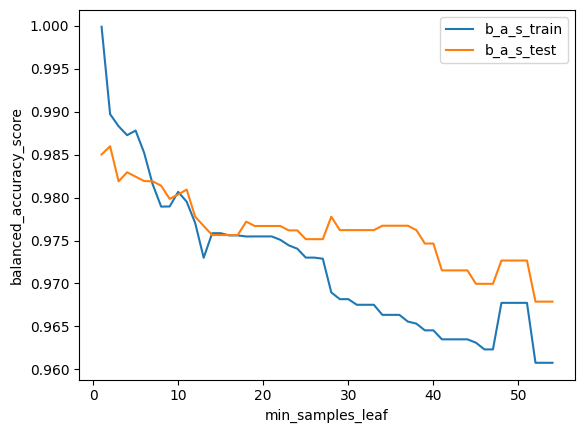

In [78]:
res_2 = []
for param in range(1, 55, 1):
    model_2 = DecisionTreeClassifier(min_samples_leaf=param, random_state=42)

    model_2.fit(X_train, y_train)
    pred_train_2 = model_2.predict(X_train)
    pred_test_2 = model_2.predict(X_test)

    res_2.append([param, balanced_accuracy_score(y_train, pred_train_2), balanced_accuracy_score(y_test, pred_test_2)])
    
res_pd_2 = pd.DataFrame(res_2, columns=['min_samples_leaf', 'b_a_s_train', 'b_a_s_test'])

res_pd_2.set_index('min_samples_leaf')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_2.set_index('min_samples_leaf')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [88]:
res_pd_2[res_pd_2['b_a_s_test'] == res_pd_2['b_a_s_test'].max()]

,min_samples_leaf,b_a_s_train,b_a_s_test
1,2,0.989708,0.985969


Получается, что при min_samples_leaf = 2 наблюдается максимальная точность модели

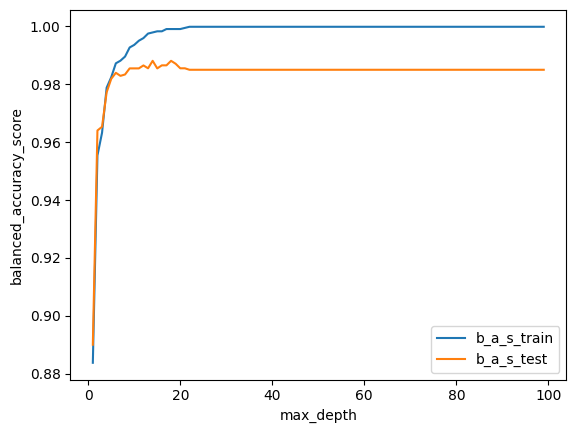

In [89]:
res_3 = []
for param in range(1, 100, 1):
    model_3 = DecisionTreeClassifier(max_depth=param, min_samples_leaf=1, random_state=42)

    model_3.fit(X_train, y_train)
    pred_train_3 = model_3.predict(X_train)
    pred_test_3 = model_3.predict(X_test)

    res_3.append([param, balanced_accuracy_score(y_train, pred_train_3), balanced_accuracy_score(y_test, pred_test_3)])
    
res_pd_3 = pd.DataFrame(res_3, columns=['max_depth', 'b_a_s_train', 'b_a_s_test'])

res_pd_3.set_index('max_depth')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_3.set_index('max_depth')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [90]:
res_pd_3[res_pd_3['b_a_s_test'] == res_pd_3['b_a_s_test'].max()]

,max_depth,b_a_s_train,b_a_s_test
13,14,0.997918,0.988106
17,18,0.999091,0.988106


Получается, что при max_depth = 14 и 18 наблюдается максимальная точность модели

Попробуем обучить модель с min_samples_leaf=2 и max_depth=14

In [91]:
model_3_test = DecisionTreeClassifier(min_samples_leaf=2, max_depth=14, random_state=1)

model_3_test.fit(X_train, y_train)
pred_train_3_test = model_3_test.predict(X_train)
pred_test_3_test = model_3_test.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_3_test)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_3_test)}')

Качество на обучающей выборке: 0.9904900539240513
Качество на валидационной выборке: 0.9839285714285715


**Мы обучили модель по наилучшим параметрам в цикле, ее качество можно оценивать как высокое, сравнимо с первой моделью, полное сравнение мы сделаем в общем выводе**

*4. Подберите лучшую модель случайного леса:*
*   Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.
*   Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.
*   Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

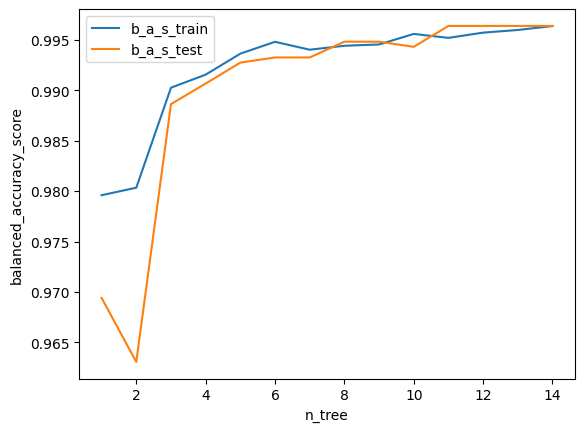

In [99]:
res_4 = []
for n_tree in range(1, 15):
    model_4 = RandomForestClassifier(n_estimators=n_tree, min_samples_leaf=2, random_state=7)

    model_4.fit(X_train, y_train)
    pred_train_4 = model_4.predict(X_train)
    pred_test_4 = model_4.predict(X_test)

    res_4.append([n_tree, balanced_accuracy_score(y_train, pred_train_4), balanced_accuracy_score(y_test, pred_test_4)])

res_pd_4 = pd.DataFrame(res_4, columns=['n_tree', 'b_a_s_train', 'b_a_s_test'])

res_pd_4.set_index('n_tree')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_4.set_index('n_tree')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [100]:
res_pd_4[res_pd_4['b_a_s_test'] == res_pd_4['b_a_s_test'].max()]

,n_tree,b_a_s_train,b_a_s_test
10,11,0.995181,0.996365
11,12,0.995700,0.996365
12,13,0.995963,0.996365
13,14,0.996354,0.996365


Минимальное количество деревьев - 11 при min_samples_leaf = 2, в этом случае самая высокая точность модели

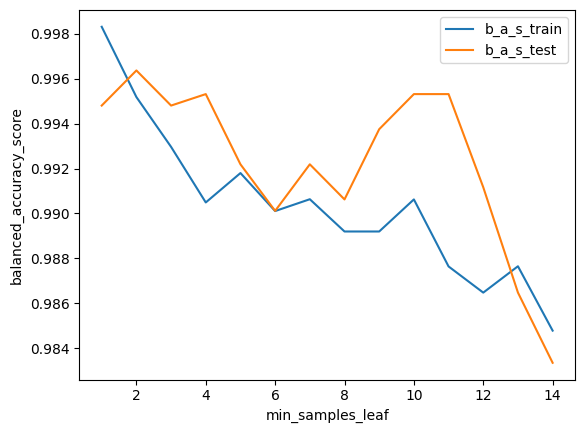

In [103]:
res_5 = []
for ml in range(1, 15):
    model_5 = RandomForestClassifier(n_estimators=11, min_samples_leaf=ml, random_state=7)

    model_5.fit(X_train, y_train)
    pred_train_5 = model_5.predict(X_train)
    pred_test_5 = model_5.predict(X_test)

    res_5.append([ml, balanced_accuracy_score(y_train, pred_train_5), balanced_accuracy_score(y_test, pred_test_5)])

res_pd_5 = pd.DataFrame(res_5, columns=['min_samples_leaf', 'b_a_s_train', 'b_a_s_test'])

res_pd_5.set_index('min_samples_leaf')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_5.set_index('min_samples_leaf')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [104]:
res_pd_5[res_pd_5['b_a_s_test'] == res_pd_5['b_a_s_test'].max()]

,min_samples_leaf,b_a_s_train,b_a_s_test
1,2,0.995181,0.996365


При min_samples_leaf = 2 наблюдается максимальная точность модели

Теперь обучим модель по данным параметрам:

In [105]:
model_5_test = RandomForestClassifier(n_estimators=11, min_samples_leaf=2, random_state=1)

model_5_test.fit(X_train, y_train)
pred_train_5_test = model_5_test.predict(X_train)
pred_test_5_test = model_5_test.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_5_test)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_5_test)}')

Качество на обучающей выборке: 0.9950536027660073
Качество на валидационной выборке: 0.993781887755102


**Мы обучили модель по наилучшим параметрам в цикле, ее качество можно оценивать как высокое, сравнимо с первой моделью, полное сравнение мы сделаем в общем выводе**

*5. Подберите лучший вариант градиентного бустинга:*
*   Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.
*   Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.
*   На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.
*   Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.
*   Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

In [106]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312


[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312
[2]	validation_0-logloss:0.48380	validation_1-logloss:0.48490
[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312
[2]	validation_0-logloss:0.48380	validation_1-logloss:0.48490
[3]	validation_0-logloss:0.43363	validation_1-logloss:0.43487
[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312
[2]	validation_0-logloss:0.48380	validation_1-logloss:0.48490
[3]	validation_0-logloss:0.43363	validation_1-logloss:0.43487
[4]	validation_0-logloss:0.39014	validation_1-logloss:0.39184
[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312
[2]	validation_0-logloss:0.48380	validation_1-logloss:0.48490
[3]	validation_0-logloss:0.43363	validation_1-logloss:0.43487
[4]	vali

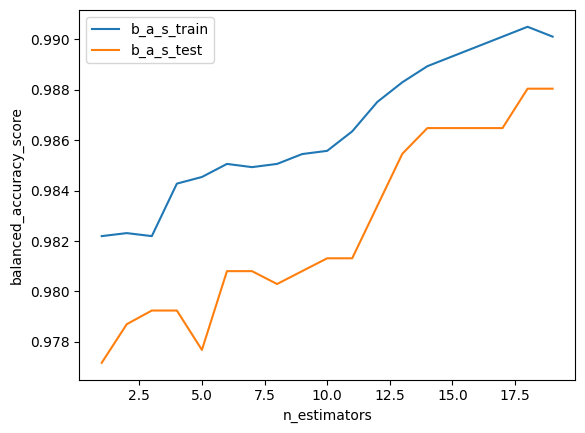

In [112]:
res_xgb_1 = []
for ne in range(1, 20):
    model_xgb_1 = XGBClassifier(n_estimators=ne, learning_rate=0.09)

    model_xgb_1.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
    pred_train_xgb_1 = model_xgb_1.predict(X_train)
    pred_test_xgb_1 = model_xgb_1.predict(X_test)

    res_xgb_1.append([ne, balanced_accuracy_score(y_train, pred_train_xgb_1), balanced_accuracy_score(y_test, pred_test_xgb_1)])

res_pd_xgb_1 = pd.DataFrame(res_xgb_1, columns=['n_estimators', 'b_a_s_train', 'b_a_s_test'])

res_pd_xgb_1.set_index('n_estimators')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_xgb_1.set_index('n_estimators')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [113]:
res_pd_xgb_1[res_pd_xgb_1['b_a_s_test'] == res_pd_xgb_1['b_a_s_test'].max()]

,n_estimators,b_a_s_train,b_a_s_test
17,18,0.990498,0.988042
18,19,0.990107,0.988042


Количесво деревьев 18, при этом достигается максимальная точность модели, теперь "переберем" другой параметр - максимальную глубину деревьев

[0]	validation_0-logloss:0.63073	validation_1-logloss:0.63151
[1]	validation_0-logloss:0.57697	validation_1-logloss:0.57693
[2]	validation_0-logloss:0.53118	validation_1-logloss:0.53158
[3]	validation_0-logloss:0.49088	validation_1-logloss:0.49046
[4]	validation_0-logloss:0.45602	validation_1-logloss:0.45604
[5]	validation_0-logloss:0.42495	validation_1-logloss:0.42416
[6]	validation_0-logloss:0.39793	validation_1-logloss:0.39743
[7]	validation_0-logloss:0.37348	validation_1-logloss:0.37220
[8]	validation_0-logloss:0.35208	validation_1-logloss:0.35099
[9]	validation_0-logloss:0.33237	validation_1-logloss:0.33054
[10]	validation_0-logloss:0.31505	validation_1-logloss:0.31378
[11]	validation_0-logloss:0.29905	validation_1-logloss:0.29670
[12]	validation_0-logloss:0.28476	validation_1-logloss:0.28280
[13]	validation_0-logloss:0.27149	validation_1-logloss:0.26948
[14]	validation_0-logloss:0.25909	validation_1-logloss:0.25681
[15]	validation_0-logloss:0.24812	validation_1-logloss:0.24613


[16]	validation_0-logloss:0.23783	validation_1-logloss:0.23577
[17]	validation_0-logloss:0.22823	validation_1-logloss:0.22612
[0]	validation_0-logloss:0.61843	validation_1-logloss:0.61756
[1]	validation_0-logloss:0.55596	validation_1-logloss:0.55399
[2]	validation_0-logloss:0.50301	validation_1-logloss:0.50032
[3]	validation_0-logloss:0.45745	validation_1-logloss:0.45451
[4]	validation_0-logloss:0.41675	validation_1-logloss:0.41330
[5]	validation_0-logloss:0.38135	validation_1-logloss:0.37743
[6]	validation_0-logloss:0.35050	validation_1-logloss:0.34612
[7]	validation_0-logloss:0.32345	validation_1-logloss:0.31866
[8]	validation_0-logloss:0.29926	validation_1-logloss:0.29467
[9]	validation_0-logloss:0.27790	validation_1-logloss:0.27289
[10]	validation_0-logloss:0.25898	validation_1-logloss:0.25367
[11]	validation_0-logloss:0.24191	validation_1-logloss:0.23670
[12]	validation_0-logloss:0.22675	validation_1-logloss:0.22110
[13]	validation_0-logloss:0.21319	validation_1-logloss:0.20686
[1

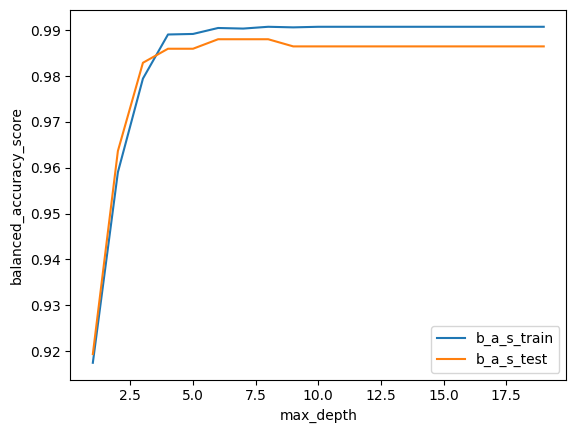

In [118]:
res_xgb_2 = []
for md in range(1, 20):
    model_res_xgb_2 = XGBClassifier(n_estimators=18, max_depth=md, learning_rate=0.09)

    model_res_xgb_2.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
    pred_train_xgb_2 = model_res_xgb_2.predict(X_train)
    pred_test_xgb_2 = model_res_xgb_2.predict(X_test)

    res_xgb_2.append([md, balanced_accuracy_score(y_train, pred_train_xgb_2), balanced_accuracy_score(y_test, pred_test_xgb_2)])

res_pd_xgb_2 = pd.DataFrame(res_xgb_2, columns=['max_depth', 'b_a_s_train', 'b_a_s_test'])

res_pd_xgb_2.set_index('max_depth')['b_a_s_train'].plot(label='b_a_s_train')
res_pd_xgb_2.set_index('max_depth')['b_a_s_test'].plot(label='b_a_s_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

In [119]:
res_pd_xgb_2[res_pd_xgb_2['b_a_s_test'] == res_pd_xgb_2['b_a_s_test'].max()]

,max_depth,b_a_s_train,b_a_s_test
5,6,0.990498,0.988042
6,7,0.990371,0.988042
7,8,0.990761,0.988042


Максимальная глубина деревьев 6, при этом достигается максимальная точность модели, теперь построим модель с данными параметрами

In [120]:
model_xgb = XGBClassifier(n_estimators=18, max_depth=6, learning_rate=0.09)

model_xgb.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train_xgb = model_res_xgb_2.predict(X_train)
pred_test_xgb = model_res_xgb_2.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_xgb)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_xgb)}')

[0]	validation_0-logloss:0.61113	validation_1-logloss:0.61160
[1]	validation_0-logloss:0.54234	validation_1-logloss:0.54312
[2]	validation_0-logloss:0.48380	validation_1-logloss:0.48490
[3]	validation_0-logloss:0.43363	validation_1-logloss:0.43487
[4]	validation_0-logloss:0.39014	validation_1-logloss:0.39184
[5]	validation_0-logloss:0.35226	validation_1-logloss:0.35430
[6]	validation_0-logloss:0.31886	validation_1-logloss:0.32138
[7]	validation_0-logloss:0.28935	validation_1-logloss:0.29240
[8]	validation_0-logloss:0.26324	validation_1-logloss:0.26669
[9]	validation_0-logloss:0.23980	validation_1-logloss:0.24398
[10]	validation_0-logloss:0.21893	validation_1-logloss:0.22380
[11]	validation_0-logloss:0.20002	validation_1-logloss:0.20523
[12]	validation_0-logloss:0.18316	validation_1-logloss:0.18865
[13]	validation_0-logloss:0.16801	validation_1-logloss:0.17401
[14]	validation_0-logloss:0.15434	validation_1-logloss:0.16046
[15]	validation_0-logloss:0.14196	validation_1-logloss:0.14814
[1

**Мы обучили модель по наилучшим параметрам в цикле, ее качество можно оценивать как высокое, сравнимо с первой моделью, полное сравнение мы сделаем в общем выводе**

*6. В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.*

Мы посмотрели следующие модели:

In [121]:
tabledata = [["DecisionTreeClassifier max_depth=22", 0.9999, 0.9871],
            ["DecisionTreeClassifier(min_samples_leaf=2, max_depth=14)", 0.9905, 0.9839],
            ["RandomForestClassifier(n_estimators=11, min_samples_leaf=2)", 0.9951, 0.9938],
            ["XGBClassifier(n_estimators=18, max_depth=6, learning_rate=0.09)", 0.9908, 0.9848]]

pd.DataFrame(tabledata, columns=["Модель","Качество на обучающей выборке", "Качество на тестовой"])


,Модель,Качество на обучающей выборке,Качество на тестовой
0,DecisionTreeClassifier max_depth=22,0.9999,0.9871
1,"DecisionTreeClassifier(min_samples_leaf=2, max...",0.9905,0.9839
2,"RandomForestClassifier(n_estimators=11, min_sa...",0.9951,0.9938
3,"XGBClassifier(n_estimators=18, max_depth=6, le...",0.9908,0.9848


По показателям лучше всех на тестовой выборке отработала модель RandomForestClassifier. Но так как мы подбирали наилучшие параметры для каждой модели, то все они показывали себя "хорошо", качество у каждой высокое.